In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read Dataset

In [2]:
netflix = pd.read_csv("C://Users//kjs//Downloads//netflix_titles.csv")

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Feature Engineering

In [6]:
netflix['first_country'] = netflix['country'].str.split(',').str[0]

# Drop rows where the 'first_country' column is null
netflix = netflix.dropna(subset=['first_country'])

# Now, 'first_country' column contains the first country mentioned in the 'country' column

# If you want to create a new DataFrame with only the relevant columns
netflix = netflix[['description', 'first_country']].dropna()


# PreProcessing

In [7]:
# Text preprocessing: remove punctuation, convert to lowercase, and apply stemming
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenization and stemming using NLTK's Porter Stemmer
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in text.split()]
    return ' '.join(tokens)


# Data Split

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(netflix['description'], netflix['first_country'], test_size=0.1, random_state=111)


# Vectorization using TF-IDF

In [9]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Use the English stop words
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes Classifier

In [10]:
# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)



# Model Evaluation

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.47


# Word cloud

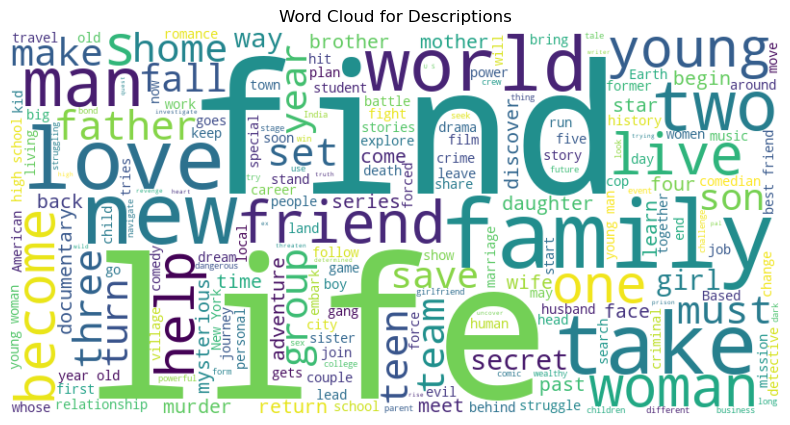

In [12]:
# Assuming df is your DataFrame with a 'description' column
text = ' '.join(netflix['description'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions')
plt.show()

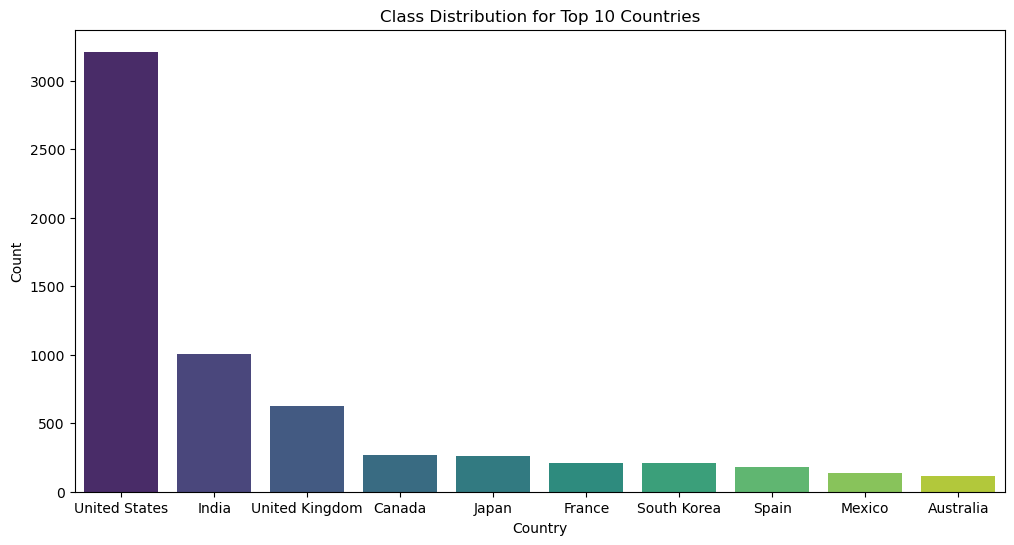

In [13]:
import seaborn as sns

top_countries = netflix['first_country'].value_counts().nlargest(10).index
df_top_countries = netflix[netflix['first_country'].isin(top_countries)]

# Plot the class distribution for the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(x='first_country', data=df_top_countries, order=top_countries, palette='viridis')
plt.title('Class Distribution for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [14]:
# Accumulate features and their probabilities for each class
feature_probs = {}
class_labels = classifier.classes_
feature_names = tfidf_vectorizer.get_feature_names_out()

for i, class_label in enumerate(class_labels):
    feature_prob = classifier.feature_log_prob_[i]
    top_feature_index = feature_prob.argsort()[-1]
    top_feature_name = feature_names[top_feature_index]

    # Skip stop words in the top features
    while top_feature_name.lower() in tfidf_vectorizer.stop_words_:
        top_feature_index -= 1
        top_feature_name = feature_names[top_feature_index]

    feature_probs[top_feature_name] = feature_prob[top_feature_index]

# Select the top 10 unique features
top_features = sorted(feature_probs.items(), key=lambda x: x[1], reverse=True)[:10]

print('\nTop Unique Features:')
for feature, prob in top_features:
    print(f'Feature: {feature}, Log Probability: {prob:.2f}')


Top Unique Features:
Feature: mexico, Log Probability: -4.62
Feature: man, Log Probability: -4.65
Feature: life, Log Probability: -4.78
Feature: spain, Log Probability: -4.88
Feature: french, Log Probability: -4.92
Feature: hong, Log Probability: -5.07
Feature: series, Log Probability: -5.12
Feature: south, Log Probability: -5.37
Feature: love, Log Probability: -5.53
Feature: german, Log Probability: -5.67
